In [1]:
%load_ext lab_black
%matplotlib inline

In [2]:
import pandas as pd

subset = "FD001"

df = pd.read_csv(
    f"data/cmapss/train_{subset}.txt", delimiter=" ", header=None, index_col=False
).fillna(method="bfill")
df = df.dropna(axis="columns", how="all")
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [3]:
n_operational_settings = 3
n_sensors = 21
assert (
    df.shape[1] == n_operational_settings + n_sensors + 2
), "Expected %d columns, got %d." % (
    n_operational_settings + n_sensors + 2,
    df.shape[1],
)

In [4]:
df.columns = (
    ["trajectory_id", "t"]
    + ["setting_" + str(i + 1) for i in range(n_operational_settings)]
    + ["sensor_" + str(i + 1) for i in range(n_sensors)]
)
df = df.drop(["t"], axis=1)
df

,trajectory_id,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [5]:
if subset in ["FD001", "FD003"]:
    # drop operating_modes (FD001 and FD003 have only 1 operating mode)
    df = df.drop(
        ["setting_" + str(i + 1) for i in range(n_operational_settings)], axis=1
    )

    # drop sensors which are useless according to the literature
    to_drop = [1, 5, 6, 10, 16, 18, 19]
    df = df.drop(["sensor_" + str(d) for d in to_drop], axis=1)
df

,trajectory_id,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21
0,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735
20627,100,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594
20628,100,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333
20629,100,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640


## Label RUL

In [6]:
cumul = []
for traj_id, traj in df.groupby("trajectory_id"):
    cumul.append(traj.assign(rul=traj.index[-1] - traj.index))
    # print(traj.index, traj.index[-1] - traj.index[0] + 1)
    # break
df = pd.concat(cumul)
df

,trajectory_id,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,rul
0,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


## Monotonicity

In [52]:
cumul = []
for traj_id, traj in df.groupby("trajectory_id"):
    cumul.append(traj.drop("trajectory_id", axis=1).corr())
corr = pd.concat(cumul)
monotonicity = (
    corr[["rul"]]
    .reset_index()
    .groupby("index")
    .mean()
    .abs()
    .sort_values("rul", ascending=False)
    .reset_index()
    .rename(columns={"index": "feature", "rul": "monotonicity"})
    .drop(0)
)
monotonicity

,feature,monotonicity
1,sensor_11,0.810601
2,sensor_12,0.789662
3,sensor_4,0.781614
4,sensor_7,0.761514
5,sensor_15,0.724844
6,sensor_21,0.716710
7,sensor_20,0.714120
8,sensor_13,0.687316
9,sensor_8,0.683526
10,sensor_2,0.675276


## Trendability

In [14]:
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

cols = df.columns.drop(["trajectory_id", "rul"])
d = dict()
ngroups = df.groupby("trajectory_id").ngroups
for col in cols:
    d[col] = 0
    for i in range(1, ngroups):
        x = df[["trajectory_id", col]].query(f"trajectory_id=={i}")[col].values
        y = df[["trajectory_id", col]].query(f"trajectory_id=={i+1}")[col].values
        distance, _ = fastdtw(x, y, dist=euclidean)
        d[col] += distance
    d[col] /= ngroups
d

{'sensor_2': 56.18979999999996,
 'sensor_3': 713.3328999999999,
 'sensor_4': 802.4698,
 'sensor_7': 85.68279999999997,
 'sensor_8': 8.282199999996456,
 'sensor_9': 2961.322099999995,
 'sensor_11': 22.18489999999999,
 'sensor_12': 66.81389999999986,
 'sensor_13': 8.301399999999154,
 'sensor_14': 2868.777600000001,
 'sensor_15': 3.846088000000001,
 'sensor_17': 149.93,
 'sensor_20': 18.913199999999996,
 'sensor_21': 11.309528000000006}

In [56]:
d_df = pd.DataFrame.from_records([(k, v) for k, v in d.items()]).rename(
    columns={0: "feature", 1: "dtw"}
)
trendability = (
    d_df.assign(trendability=np.exp(-d_df.dtw))
    .drop("dtw", axis=1)
    .sort_values("trendability", ascending=False)
)
trendability

,feature,trendability
10,sensor_15,2.136315e-02
4,sensor_8,2.529800e-04
8,sensor_13,2.481691e-04
13,sensor_21,1.225559e-05
12,sensor_20,6.110850e-09
6,sensor_11,2.318571e-10
0,sensor_2,3.954394e-25
7,sensor_12,9.618158e-30
3,sensor_7,6.143739e-38
11,sensor_17,7.695349e-66


## Prognosability

In [54]:
grouped = df.drop("rul", axis=1).groupby("trajectory_id")
starting_values, failure_values = grouped.first(), grouped.last()
prognosability = (
    np.exp(-failure_values.std() / (failure_values - starting_values).abs().mean())
    .to_frame()
    .reset_index()
    .rename(columns={"index": "feature", 0: "prognosability"})
    .sort_values("prognosability", ascending=False)
)
prognosability

,feature,prognosability
2,sensor_4,0.870935
6,sensor_11,0.867055
7,sensor_12,0.846554
10,sensor_15,0.841866
3,sensor_7,0.838095
12,sensor_20,0.828945
13,sensor_21,0.809141
0,sensor_2,0.804795
11,sensor_17,0.792864
1,sensor_3,0.762378


In [62]:
fitness = prognosability.merge(trendability, on="feature").merge(
    monotonicity, on="feature"
)
fitness = fitness.assign(
    fitness=fitness.prognosability + fitness.trendability + fitness.monotonicity
).sort_values("fitness", ascending=False)
fitness

,feature,prognosability,trendability,monotonicity,fitness
1,sensor_11,0.867055,2.318571e-10,0.810601,1.677656
0,sensor_4,0.870935,0.000000e+00,0.781614,1.652549
2,sensor_12,0.846554,9.618158e-30,0.789662,1.636217
4,sensor_7,0.838095,6.143739e-38,0.761514,1.599610
3,sensor_15,0.841866,2.136315e-02,0.724844,1.588073
5,sensor_20,0.828945,6.110850e-09,0.714120,1.543065
6,sensor_21,0.809141,1.225559e-05,0.716710,1.525863
7,sensor_2,0.804795,3.954394e-25,0.675276,1.480071
8,sensor_17,0.792864,7.695349e-66,0.673123,1.465987
9,sensor_3,0.762378,1.597562e-310,0.643950,1.406328


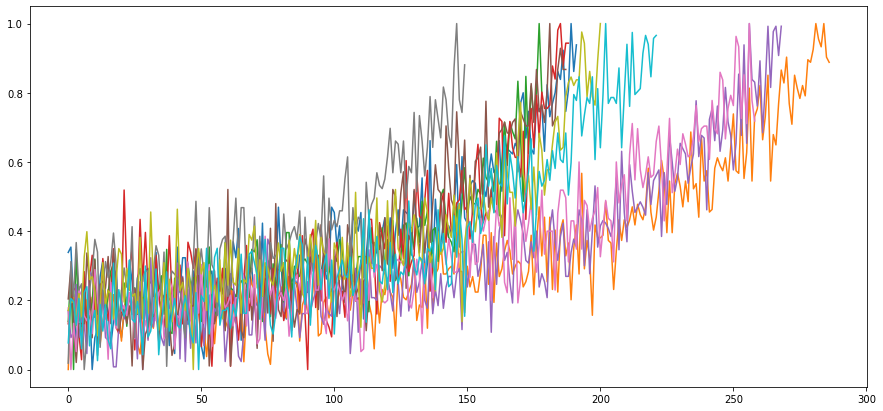

In [101]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 7))
scaler = MinMaxScaler(feature_range=(0, 1))
for traj_id, traj in df.groupby("trajectory_id"):
    traj_norm = scaler.fit_transform(traj.loc[:, "sensor_11"].values.reshape(-1, 1))
    pd.Series(traj_norm.ravel()).plot(ax=ax)
    if traj_id == 10:
        break

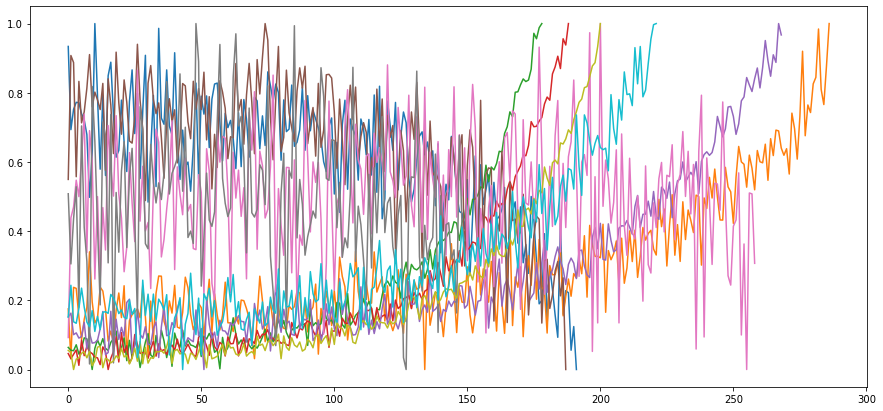

In [102]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 7))
scaler = MinMaxScaler(feature_range=(0, 1))
for traj_id, traj in df.groupby("trajectory_id"):
    traj_norm = scaler.fit_transform(traj.loc[:, "sensor_14"].values.reshape(-1, 1))
    pd.Series(traj_norm.ravel()).plot(ax=ax)
    if traj_id == 10:
        break